Link for ZipFile -
<a>https://www.kaggle.com/manjeetsingh/retaildataset</a>

## **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import zipfile

In [2]:

feat_dataset=pd.read_csv('../input/retailanalysis/Features data set.csv')
sales_dataset=pd.read_csv('../input/retailanalysis/sales data-set.csv')
stores_dataset=pd.read_csv('../input/retailanalysis/stores data-set.csv')

## **Stores Dataset**

In [3]:
stores_dataset

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [4]:
size_type=stores_dataset.groupby(by=['Type'])['Size'].sum()
size_type

Type
A    3899450
B    1720242
C     243250
Name: Size, dtype: int64

Stores with their respective Sizes

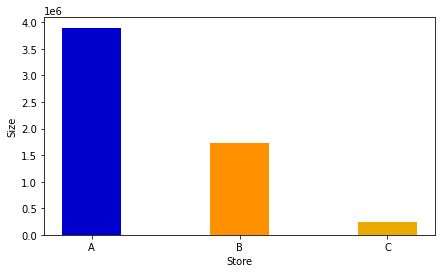

In [5]:
size_type=stores_dataset.groupby(by=['Type'])['Size'].sum()
fig,ax=plt.subplots(figsize=(7,4))
ax.bar(size_type.index,size_type.values,width=0.4,color=['#0000cd','#ff9100','#eaaa00','#6687d5'])
plt.xlabel("Store")
plt.ylabel("Size")
plt.show()

## **Features Dataset**

In [6]:
feat_dataset

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


### **Fuel Price**

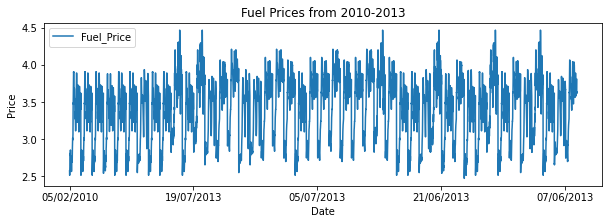

In [7]:
feat_dataset[['Date','Fuel_Price']].plot(x='Date',subplots=True,figsize=(10,3))
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Fuel Prices from 2010-2013")
plt.show()

Handling missing values in feat_dataset

In [8]:
feat_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
feat_dataset.fillna(0.0,inplace=True)

## **Sales Dataset**

In [10]:
sales_dataset

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


## **Holidays**

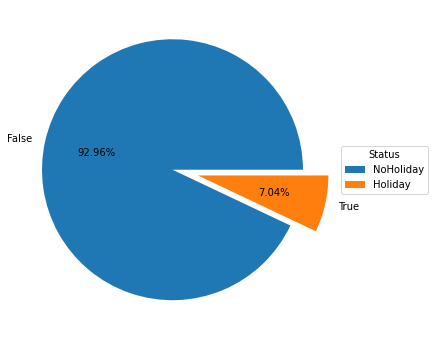

In [11]:
holidays=sales_dataset['IsHoliday'].value_counts()
fig,ax=plt.subplots(figsize=(12,6))
w,t,a=ax.pie(x=holidays.values, explode=[0,0.2], labels=holidays.index, autopct='%1.2f%%', pctdistance=0.6,)
p=['NoHoliday','Holiday']
ax.legend(w, p,
          title="Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## **Merging Datasets**

In [12]:
df=pd.merge(feat_dataset,sales_dataset,on=['Store','Date','IsHoliday'])
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,05/02/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


### Maximum value of each feature

In [13]:
df.max()

Store                   45
Date            31/12/2010
Temperature         100.14
Fuel_Price           4.468
MarkDown1         88646.76
MarkDown2        104519.54
MarkDown3        141630.61
MarkDown4         67474.85
MarkDown5        108519.28
CPI             227.232807
Unemployment        14.313
IsHoliday             True
Dept                    99
Weekly_Sales     693099.36
dtype: object

#### Sum of Weekly_Sales of Store no **10 - 20** are much higher than other Store

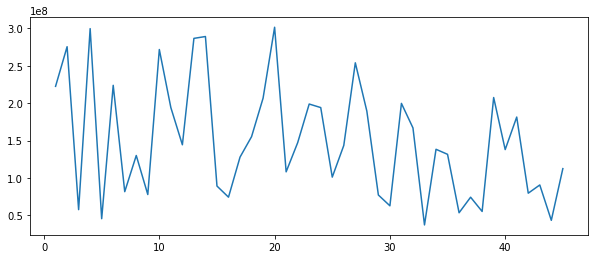

In [14]:
df_week_store_sales=df.groupby(by=['Store'],as_index=False)['Weekly_Sales'].sum()
plt.figure(figsize=(10,4))
plt.plot(df_week_store_sales.Store,df_week_store_sales.Weekly_Sales)
plt.show()

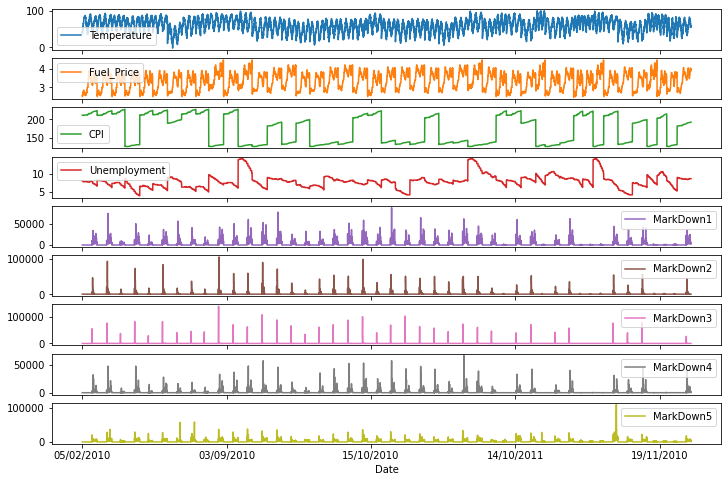

In [15]:
df[['Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 
    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(x='Date', subplots=True, figsize=(12,8))
plt.show()

The highest Sale was made on December 2010 

Correlation between the features

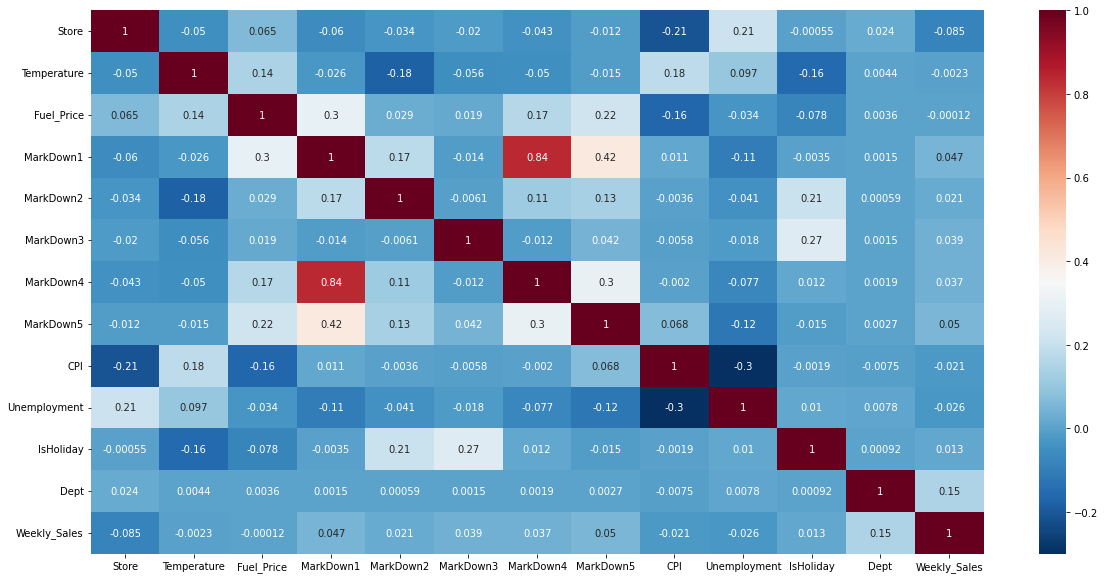

In [16]:
corr_mat_f=df.corr(method='pearson')
import seaborn as sb
plt.figure(figsize=(20,10))
sb.heatmap(corr_mat_f,cmap='RdBu_r',annot=True)
plt.show()

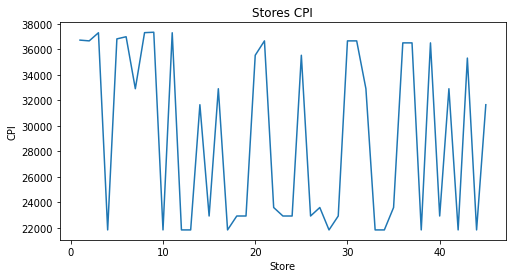

In [17]:
unemp_rate=feat_dataset.groupby(by=['Store'],as_index=False)['CPI'].sum()
plt.figure(figsize=(8,4))
plt.plot(unemp_rate.Store,unemp_rate.CPI)
plt.xlabel("Store")
plt.ylabel("CPI")
plt.title("Stores CPI")
plt.show()

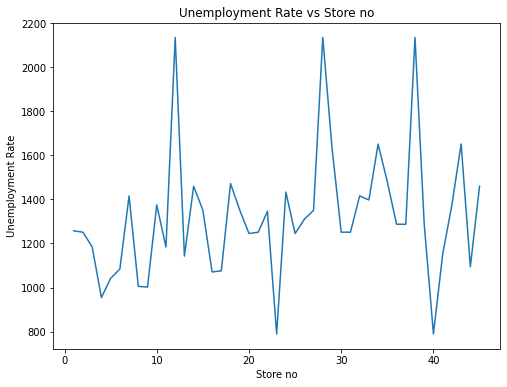

In [18]:
unemp_rate=feat_dataset.groupby(by=['Store'],as_index=False)['Unemployment'].sum()
plt.figure(figsize=(8,6))
plt.plot(unemp_rate.Store,unemp_rate.Unemployment)
plt.title('Unemployment Rate vs Store no')
plt.xlabel('Store no')
plt.ylabel('Unemployment Rate')
plt.show()

### **Markdowns**

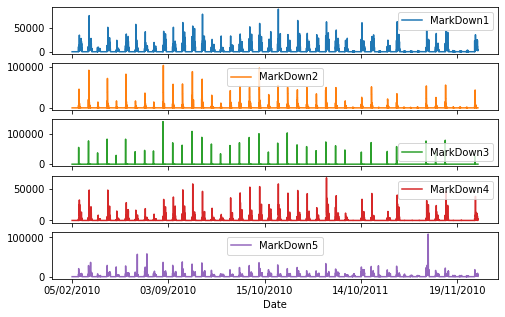

In [19]:
df[['Date','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].plot(x='Date',subplots=True,figsize=(8,5))
plt.show()

## **Predictions (Weakly Sales)**

In [20]:
df=df.drop('Date',axis=1)
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


Encoding the categorical column "IsHoliday"

In [21]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['IsHoliday']=enc.fit_transform(df['IsHoliday'])
df

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,1,24924.50
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,2,50605.27
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,3,13740.12
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,4,39954.04
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,0,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,93,2487.80
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,94,5203.31
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,95,56017.47
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,0,97,6817.48


In [22]:
X=df.iloc[:,:-1].values #Independent Variable
Y=df.iloc[:,-1].values #Dependent Variable

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [24]:
x_train

array([[15.   , 57.94 ,  2.846, ...,  8.099,  0.   , 80.   ],
       [11.   , 67.16 ,  3.787, ...,  6.833,  0.   , 20.   ],
       [ 8.   , 73.14 ,  3.786, ...,  6.297,  0.   , 31.   ],
       ...,
       [16.   , 43.29 ,  3.767, ...,  6.339,  0.   , 34.   ],
       [13.   , 40.65 ,  2.681, ...,  8.316,  0.   , 51.   ],
       [32.   , 72.95 ,  2.69 , ...,  9.017,  0.   ,  3.   ]])

# RandomForestRegressor

In [25]:
from sklearn.ensemble import RandomForestRegressor as RFG
lin=RFG()
lin.fit(x_train,y_train)
y_pred=lin.predict(x_test)

In [26]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

r2_score (Test Set)

In [27]:
score

0.9401251548125964

r2_score (Train Set)

In [28]:
x_pred=lin.predict(x_train)
score_1=r2_score(x_pred,y_train)
score_1

0.9922167698355043